<div align="center">
<img src="images/banco_de_portugal.png" alt="Banco de Portugal" width="250">
</div>

# Predicting Bank Telemarketing Sales

- Nick Gigliotti
- ndgigliotti@gmail.com

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Predicting-Bank-Telemarketing-Sales" data-toc-modified-id="Predicting-Bank-Telemarketing-Sales-1">Predicting Bank Telemarketing Sales</a></span></li><li><span><a href="#Business-Problem" data-toc-modified-id="Business-Problem-2">Business Problem</a></span></li><li><span><a href="#Dataset" data-toc-modified-id="Dataset-3">Dataset</a></span><ul class="toc-item"><li><span><a href="#Feature-Explanations" data-toc-modified-id="Feature-Explanations-3.1">Feature Explanations</a></span></li></ul></li><li><span><a href="#Initial-Cleaning" data-toc-modified-id="Initial-Cleaning-4">Initial Cleaning</a></span><ul class="toc-item"><li><span><a href="#Looking-for-Null-Placeholders" data-toc-modified-id="Looking-for-Null-Placeholders-4.1">Looking for Null Placeholders</a></span></li><li><span><a href="#Removing-Duplicates" data-toc-modified-id="Removing-Duplicates-4.2">Removing Duplicates</a></span></li><li><span><a href="#Cleaning-the-Categoricals" data-toc-modified-id="Cleaning-the-Categoricals-4.3">Cleaning the Categoricals</a></span><ul class="toc-item"><li><span><a href="#Encoding-the-Target-Variable" data-toc-modified-id="Encoding-the-Target-Variable-4.3.1">Encoding the Target Variable</a></span></li><li><span><a href="#Binning-'days_since_prev'" data-toc-modified-id="Binning-'days_since_prev'-4.3.2">Binning 'days_since_prev'</a></span></li><li><span><a href="#Tidying-up-the-Rest" data-toc-modified-id="Tidying-up-the-Rest-4.3.3">Tidying up the Rest</a></span></li></ul></li></ul></li><li><span><a href="#Exploration" data-toc-modified-id="Exploration-5">Exploration</a></span></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-6">Modeling</a></span><ul class="toc-item"><li><span><a href="#Modeling-Imports" data-toc-modified-id="Modeling-Imports-6.1">Modeling Imports</a></span></li><li><span><a href="#Train-Test-Split" data-toc-modified-id="Train-Test-Split-6.2">Train-Test Split</a></span></li><li><span><a href="#Dummy-Model" data-toc-modified-id="Dummy-Model-6.3">Dummy Model</a></span></li><li><span><a href="#Baseline-Logistic-Regression" data-toc-modified-id="Baseline-Logistic-Regression-6.4">Baseline Logistic Regression</a></span></li></ul></li><li><span><a href="#Interpretation" data-toc-modified-id="Interpretation-7">Interpretation</a></span><ul class="toc-item"><li><span><a href="#Positive-Coefficients" data-toc-modified-id="Positive-Coefficients-7.1">Positive Coefficients</a></span></li><li><span><a href="#Negative-Coefficients" data-toc-modified-id="Negative-Coefficients-7.2">Negative Coefficients</a></span></li></ul></li><li><span><a href="#Recommendations" data-toc-modified-id="Recommendations-8">Recommendations</a></span></li><li><span><a href="#Future-Work" data-toc-modified-id="Future-Work-9">Future Work</a></span></li></ul></div>

# Business Problem

Banco de Portugal has asked me to create a model to help them predict which customers are likely to invest in term deposit accounts as a result of telemarketing. Telemarketing is, no doubt, very stressful and time-consuming work. Salespersons don't like to waste the time of customers, because it's a waste of their time too. Not only that, but dealing with uninterested customers is surely the ugliest part the job. How many times a day does a bank telemarketer have to put up with insults and rude remarks? On the other hand, salespersons who are stuck calling low-potential customers are likely to resort to aggressive, desperate, sales tactics. It's like trench warfare over the phone, and it needs to be made easier.

That's where machine learning comes into play, and in particular **logistic regression**. Logistic regression models are widely used because they offer a good combination of simplicity and predictive power. My goal is to create a strong predictive model which can predict investments based on data which can be realistically obtained in advance. Banco de Portugal will use my model to increase the efficency of their telemarketing efforts by discovering the customers with the highest probability of investing.


# Dataset
I train my predictive classifier on a bank telemarketing dataset from Portugal which is publically available on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing). The data was collected between May 2008 and November 2010.

In [1]:
from distutils.util import strtobool
from functools import partial

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import ticker

RUN_SWEEPS = False

sns.set_theme(style="darkgrid", context="notebook")
sns.set_palette("deep", desat=0.85, color_codes=True)
%matplotlib inline
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
# My modules
from ndg_tools import cleaning, outliers, plotting, utils

plt.rcParams.update(plotting.MPL_DEFAULTS)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ndgig\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\ndgig\AppData\Roaming\nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ndgig\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


<IPython.core.display.Javascript object>

There looks to be a mixture of categorical and numeric features. The feature labeled "y" is the target variable, namely whether or not the person invested in a term deposit.

In [3]:
df = pd.read_csv("data/bank-additional-full.csv", sep=";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


<IPython.core.display.Javascript object>

There are 21 features total and about 41k observations. About half of the features are "object" type, meaning that they're most likely categorical.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

<IPython.core.display.Javascript object>

Yep, there are quite a few categorical variables. Even the numeric variables have strikingly few unique values for a dataset of 41k.

In [5]:
df.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

<IPython.core.display.Javascript object>

I rename some features to make them a little easier to interpret. Every variable prefixed with "contact" has to do with the last contact of the current campaign.

In [6]:
# Replace periods with underscores
df.columns = df.columns.str.replace(".", "_", regex=False)

# Map old names to new names
rename = {
    "y": "invested",
    "poutcome": "prev_outcome",
    "pdays": "days_since_prev",
    "previous": "prev_contact_count",
    "campaign": "contact_count",
    "month": "contact_month",
    "day_of_week": "contact_weekday",
    "duration": "contact_duration",
    "contact": "contact_type",
    "nr_employed": "n_employed",
    "euribor3m": "euribor_3m",
}

# Rename using dictionary
df.rename(columns=rename, inplace=True)

# Delete dictionary
del rename

# Display results
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact_type', 'contact_month', 'contact_weekday', 'contact_duration',
       'contact_count', 'days_since_prev', 'prev_contact_count',
       'prev_outcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx',
       'euribor_3m', 'n_employed', 'invested'],
      dtype='object')

<IPython.core.display.Javascript object>

## Feature Explanations
#### Client Information
   
1. 'age' - years
2. 'job' - type of job
3. 'marital' - marital status
4. 'education' - level of education
5. 'default' - has defaulted on credit
6. 'housing' - has housing loan
7. 'loan' - has personal loan

#### Current Campaign

8. 'contact_type' - call type of **last contact** (cellular or landline)
9. 'contact_month' - month of **last contact**
10. 'contact_weekday' - weekday of **last contact**
11. 'contact_duration' - duration of **last contact** in seconds
12. 'contact_count' - total number of contacts during this campaign
13. 'invested' - invested in a term deposit (target variable)

>A term deposit is a short-term investment which typically matures within a few months or years.

#### Previous Campaigns

14. 'days_since_prev' - number of days since last contacted during previous campaign
15. 'prev_contact_count' - total number of contacts before this campaign
16. 'prev_outcome' - sales result of previous campaign

#### Economic Context

17. 'emp_var_rate' - employment variation rate (quarterly indicator)
18. 'cons_price_idx' - consumer price index (monthly indicator)
19. 'cons_conf_idx' - consumer confidence index (monthly indicator)
20. 'euribor_3m' - euribor 3 month rate (daily indicator)
21. 'n_employed' - thousands of people employed (quarterly indicator)

# Initial Cleaning

I do some preliminary tidying up and reorganization but leave most of the preprocessing for the modeling section. Using Sklearn's preprocessing pipelines allows the preprocessors and their parameters to be adjusted alongside the model itself.

## Looking for Null Placeholders

I begin by checking the categorical unique values for null placeholders.

In [7]:
cleaning.show_uniques(df, cut=20)

job,marital,education,default,housing,loan,contact_type,contact_month,contact_weekday,prev_contact_count,prev_outcome,emp_var_rate,n_employed,invested
housemaid,married,basic.4y,no,no,no,telephone,may,mon,0.0,nonexistent,1.1,5191.0,no
services,single,high.school,unknown,yes,yes,cellular,jun,tue,1.0,failure,1.4,5228.1,yes
admin.,divorced,basic.6y,yes,unknown,unknown,,jul,wed,2.0,success,-0.1,5195.8,
blue-collar,unknown,basic.9y,,,,,aug,thu,3.0,,-0.2,5176.3,
technician,,professional.course,,,,,oct,fri,4.0,,-1.8,5099.1,
retired,,unknown,,,,,nov,,5.0,,-2.9,5076.2,
management,,university.degree,,,,,dec,,6.0,,-3.4,5017.5,
unemployed,,illiterate,,,,,mar,,7.0,,-3.0,5023.5,
self-employed,,,,,,,apr,,,,-1.7,5008.7,
unknown,,,,,,,sep,,,,-1.1,4991.6,


<IPython.core.display.Javascript object>

There are some null-like labels, but they seem like categories in their own right. I have in mind 'unknown' and 'nonexistent'.

Next, I check the ranges of the numeric variables in search of null placeholders.

In [8]:
df.select_dtypes("number").describe()

,age,contact_duration,contact_count,days_since_prev,prev_contact_count,emp_var_rate,cons_price_idx,cons_conf_idx,euribor_3m,n_employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


<IPython.core.display.Javascript object>

The only placeholder-like value I see is 999 for 'days_since_prev'. I'll go ahead and fill that with `np.NaN`.

In [9]:
df["days_since_prev"] = df["days_since_prev"].replace(999, np.NaN)
df["days_since_prev"].describe()

count    1515.000000
mean        6.014521
std         3.824906
min         0.000000
25%         3.000000
50%         6.000000
75%         7.000000
max        27.000000
Name: days_since_prev, dtype: float64

<IPython.core.display.Javascript object>

Next I inspect the null and duplicate stats to see what I'm dealing with.

In [10]:
cleaning.info(df)

,null,null_%,uniq,uniq_%,dup,dup_%
days_since_prev,39673,96.32,26,0.06,12,0.03
age,0,0.00,78,0.19,12,0.03
contact_count,0,0.00,42,0.10,12,0.03
n_employed,0,0.00,11,0.03,12,0.03
euribor_3m,0,0.00,316,0.77,12,0.03
cons_conf_idx,0,0.00,26,0.06,12,0.03
cons_price_idx,0,0.00,26,0.06,12,0.03
emp_var_rate,0,0.00,10,0.02,12,0.03
prev_outcome,0,0.00,3,0.01,12,0.03
prev_contact_count,0,0.00,8,0.02,12,0.03


<IPython.core.display.Javascript object>

It's striking how empty 'days_since_prev' is. I should probably bin it and turn it into a categorical.

But first, I'm going to deal with the duplicates.

## Removing Duplicates

I begin by inspecting the duplicate rows to see if there's anything odd about them.

In [11]:
cleaning.dup_rows(df, keep="first")

,age,job,marital,education,default,housing,loan,contact_type,contact_month,contact_weekday,...,contact_count,days_since_prev,prev_contact_count,prev_outcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor_3m,n_employed,invested
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,NaN,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,NaN,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,NaN,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,NaN,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,NaN,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,NaN,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,NaN,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,NaN,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,NaN,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


<IPython.core.display.Javascript object>

These duplicates seem like genuine duplicates which need to be dropped. I'll go ahead and do that.

In [12]:
df.drop_duplicates(inplace=True)
cleaning.info(df)

,null,null_%,uniq,uniq_%,dup,dup_%
days_since_prev,39661,96.32,26,0.06,0,0.0
age,0,0.00,78,0.19,0,0.0
contact_count,0,0.00,42,0.10,0,0.0
n_employed,0,0.00,11,0.03,0,0.0
euribor_3m,0,0.00,316,0.77,0,0.0
cons_conf_idx,0,0.00,26,0.06,0,0.0
cons_price_idx,0,0.00,26,0.06,0,0.0
emp_var_rate,0,0.00,10,0.02,0,0.0
prev_outcome,0,0.00,3,0.01,0,0.0
prev_contact_count,0,0.00,8,0.02,0,0.0


<IPython.core.display.Javascript object>

## Cleaning the Categoricals

First, I check the uniques to see how I should process the categorical variables.

In [13]:
cleaning.show_uniques(df, cut=20)

job,marital,education,default,housing,loan,contact_type,contact_month,contact_weekday,prev_contact_count,prev_outcome,emp_var_rate,n_employed,invested
housemaid,married,basic.4y,no,no,no,telephone,may,mon,0.0,nonexistent,1.1,5191.0,no
services,single,high.school,unknown,yes,yes,cellular,jun,tue,1.0,failure,1.4,5228.1,yes
admin.,divorced,basic.6y,yes,unknown,unknown,,jul,wed,2.0,success,-0.1,5195.8,
blue-collar,unknown,basic.9y,,,,,aug,thu,3.0,,-0.2,5176.3,
technician,,professional.course,,,,,oct,fri,4.0,,-1.8,5099.1,
retired,,unknown,,,,,nov,,5.0,,-2.9,5076.2,
management,,university.degree,,,,,dec,,6.0,,-3.4,5017.5,
unemployed,,illiterate,,,,,mar,,7.0,,-3.0,5023.5,
self-employed,,,,,,,apr,,,,-1.7,5008.7,
unknown,,,,,,,sep,,,,-1.1,4991.6,


<IPython.core.display.Javascript object>

### Encoding the Target Variable

It's simple enough to encode the target variable in binary, so I'll go ahead and do that.

I use the `strtobool` function from [distutils](https://docs.python.org/3/distutils/apiref.html) (part of the Standard Library). It's a handy function which converts truth-value-indicating strings (e.g. 'y','n', 'yes', 'no', 't', 'f', 'true', 'false', 'on', 'off', '1', '0') to binary numeric values (1 and 0).

In [14]:
df["invested"] = df["invested"].map(strtobool)
df["invested"]

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: invested, Length: 41176, dtype: int64

<IPython.core.display.Javascript object>

Then I plot the class balance.

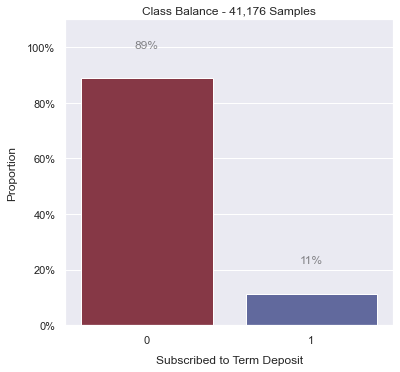

<IPython.core.display.Javascript object>

In [15]:
fig = plotting.countplot(df[["invested"]], normalize=True, height=4, orient="v")
ax = fig.axes[0]
plotting.annot_bars(ax, orient="v", format_spec="{x:.0%}")
ax.set_ylim(0, 1.1)
ax.set_title(f"Class Balance - {len(df):,.0f} Samples", pad=5)
ax.set(ylabel="Proportion", xlabel="Subscribed to Term Deposit")
fig.savefig("images/class_balance.svg", bbox_inches="tight")

The classes are imbalanced at a ratio of roughly 9:1. This is a problem I'll have to deal with in the modeling phase.

### Binning 'days_since_prev'

I engineer a categorical variable to replace the continuous 'days_since_prev', since it is 96% nulls. This will allow me to create a null category for people who were never contacted.

First I look at the distribution.

[Text(0.5, 1.0, "Distribution of 'days_since_prev'"),
 Text(0.5, 0, 'Number of Days')]

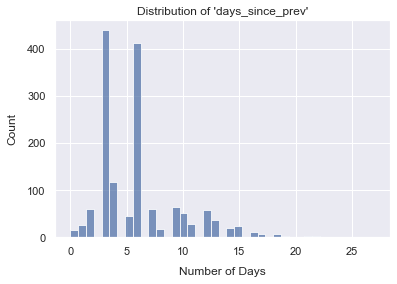

<IPython.core.display.Javascript object>

In [16]:
ax = sns.histplot(df, x="days_since_prev")
ax.set(title="Distribution of 'days_since_prev'", xlabel="Number of Days")

I'll bin the variable by tertile, since I want the categories to be coarse-grained. 96% of the samples will be in the null category, so only 4% of samples will be in one of these tertiles.

In [17]:
df["days_since_prev"] = pd.qcut(df["days_since_prev"], 3)
df["days_since_prev"]

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
41183    NaN
41184    NaN
41185    NaN
41186    NaN
41187    NaN
Name: days_since_prev, Length: 41176, dtype: category
Categories (3, interval[float64, right]): [(-0.001, 3.0] < (3.0, 6.0] < (6.0, 27.0]]

<IPython.core.display.Javascript object>

Then I convert the interval categories to strings, and add the null category, 'never_contacted'.

In [18]:
df["days_since_prev"] = (
    df["days_since_prev"]
    # Convert to string names
    .cat.rename_categories(lambda x: f"{round(x.left)}_to_{round(x.right)}_days")
    # Add null category
    .cat.add_categories(["never_contacted"])
    # Fill NaNs with null category
    .fillna("never_contacted")
)
df["days_since_prev"]

0        never_contacted
1        never_contacted
2        never_contacted
3        never_contacted
4        never_contacted
              ...       
41183    never_contacted
41184    never_contacted
41185    never_contacted
41186    never_contacted
41187    never_contacted
Name: days_since_prev, Length: 41176, dtype: category
Categories (4, object): ['0_to_3_days' < '3_to_6_days' < '6_to_27_days' < 'never_contacted']

<IPython.core.display.Javascript object>

### Tidying up the Rest

Next, I format the labels for the remaining categorical variables in a uniform way. I do this by tokenizing them (ignoring punctuation) and joining with underscore.

In [19]:
# Get string columns
str_cols = df.select_dtypes(["object", "string"]).columns

df[str_cols] = (
    df[str_cols]
    # Tokenize and re-join with underscore
    .apply(lambda x: x.str.findall(r"\b\w\w+\b").str.join("_"))
    # Convert to categorical dtype
    .astype("category")
)

cleaning.show_uniques(df[str_cols])

marital,education,default,housing,loan,contact_type,contact_month,contact_weekday,prev_outcome
married,basic_4y,no,no,no,telephone,may,mon,nonexistent
single,high_school,unknown,yes,yes,cellular,jun,tue,failure
divorced,basic_6y,yes,unknown,unknown,,jul,wed,success
unknown,basic_9y,,,,,aug,thu,
,professional_course,,,,,oct,fri,
,unknown,,,,,nov,,
,university_degree,,,,,dec,,
,illiterate,,,,,mar,,
,,,,,,apr,,
,,,,,,sep,,


<IPython.core.display.Javascript object>

Looks like the only variable affected was 'education', but that's okay. Next I'll encode 'contact_weekday' and 'contact_month' as integers, since these are ordinal categories.

In [20]:
# # Define order
# days = ["mon", "tue", "wed", "thu", "fri"]
# months = ["mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"]

# # Convert to ordered categories
# df["contact_weekday"] = df["contact_weekday"].cat.reorder_categories(days, ordered=True)
# df["contact_month"] = df["contact_month"].cat.reorder_categories(months, ordered=True)

# # Display results
# df["contact_weekday"].cat.categories, df["contact_month"].cat.categories

<IPython.core.display.Javascript object>

In [21]:
day_map = {"mon": 1, "tue": 2, "wed": 3, "thu": 4, "fri": 5}

month_map = {
    "mar": 3,
    "apr": 4,
    "may": 5,
    "jun": 6,
    "jul": 7,
    "aug": 8,
    "sep": 9,
    "oct": 10,
    "nov": 11,
    "dec": 12,
}

month_map, day_map

({'mar': 3,
  'apr': 4,
  'may': 5,
  'jun': 6,
  'jul': 7,
  'aug': 8,
  'sep': 9,
  'oct': 10,
  'nov': 11,
  'dec': 12},
 {'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5})

<IPython.core.display.Javascript object>

In [22]:
df["contact_weekday"].replace(day_map, inplace=True)
df["contact_month"].replace(month_map, inplace=True)
df[["contact_weekday", "contact_month"]]

,contact_weekday,contact_month
0,1,5
1,1,5
2,1,5
3,1,5
4,1,5
...,...,...
41183,5,11
41184,5,11
41185,5,11
41186,5,11


<IPython.core.display.Javascript object>

Finally, I save the clean dataset and proceed to exploration.

In [23]:
df.to_json("data/bank_clean.json")

<IPython.core.display.Javascript object>

# Exploration

I begin by plotting the distributions of the categorical variables.

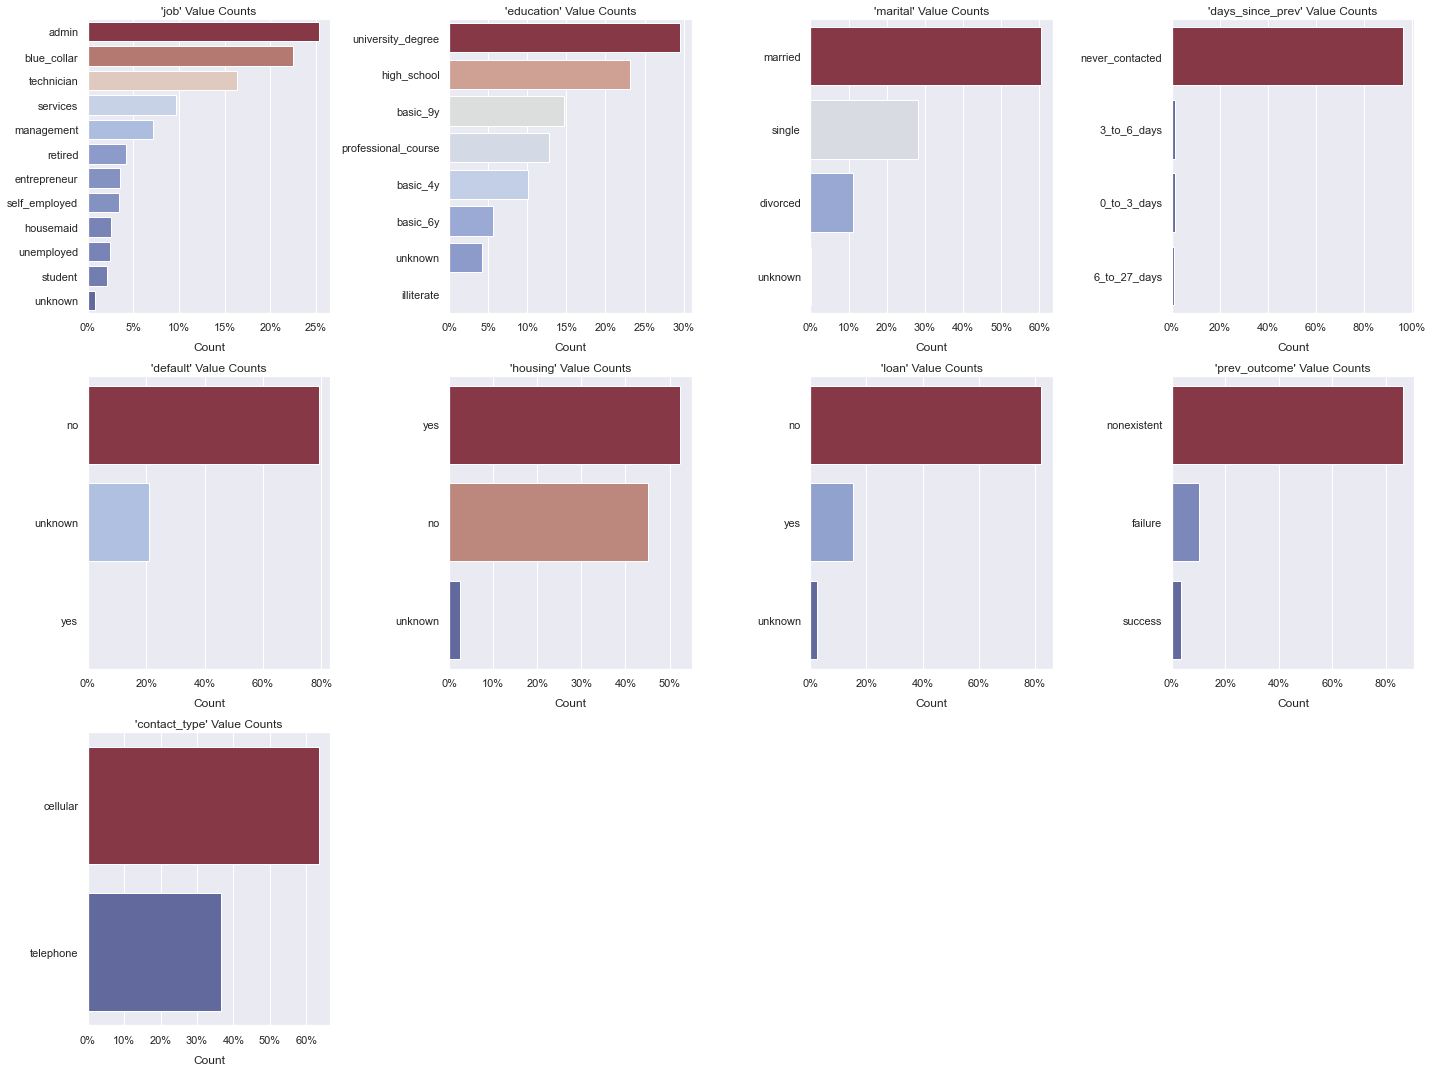

<IPython.core.display.Javascript object>

In [24]:
# Plot distributions
fig = plotting.countplot(
    df.select_dtypes("category"),
    normalize=True,
    ncols=4,
    height=3,
)

Some of the categories are very sparse, but that shouldn't be a problem. I don't think any of the small categories are noise.

Next, I calculate the correlations between the independent variables and the target.

In [25]:
target_corr = (
    pd.get_dummies(df).drop(columns="invested").corrwith(df["invested"]).sort_values()
)
target_corr

n_employed                        -0.354669
days_since_prev_never_contacted   -0.324910
euribor_3m                        -0.307740
emp_var_rate                      -0.298289
prev_outcome_nonexistent          -0.193522
contact_type_telephone            -0.144774
cons_price_idx                    -0.136134
default_unknown                   -0.099305
job_blue_collar                   -0.074431
contact_count                     -0.066361
education_basic_9y                -0.045152
marital_married                   -0.043476
job_services                      -0.032262
education_basic_6y                -0.023493
job_entrepreneur                  -0.016651
housing_no                        -0.011145
education_basic_4y                -0.010808
marital_divorced                  -0.010593
education_high_school             -0.007408
job_housemaid                     -0.006510
job_technician                    -0.006069
job_self_employed                 -0.004668
loan_yes                        

<IPython.core.display.Javascript object>

Then I plot the correlation coefficients with the largest absolute values.

[Text(0.5, 1.0, 'Correlation with Target'),
 Text(0.5, 0, 'Pearson Correlation')]

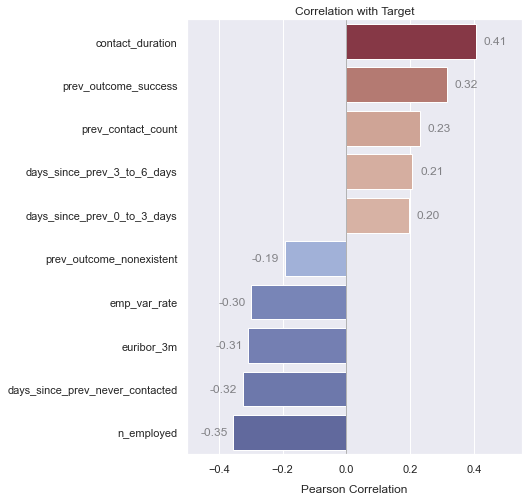

<IPython.core.display.Javascript object>

In [26]:
ax = plotting.heated_barplot(data=target_corr.loc[lambda x: x.abs().nlargest(10).index])
plotting.annot_bars(ax)
ax.set_xlim(-0.5, 0.55)
ax.set(title="Correlation with Target", xlabel="Pearson Correlation")

As stated in the description on the [UCI page](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing), 'contact_duration' has a strong relationship with 'invested'. I will ignore this feature later on, because it's not information which could be obtained in advance.

Unsurprisingly, 'prev_success' and 'recent_prev_contact' have strong positive relationships with the target. Strangely, 'n_employed' has a strong negative relationship with the target, meaning that people tend to invest when fewer people are employed.

<AxesSubplot:title={'center':'Correlations Between Features'}>

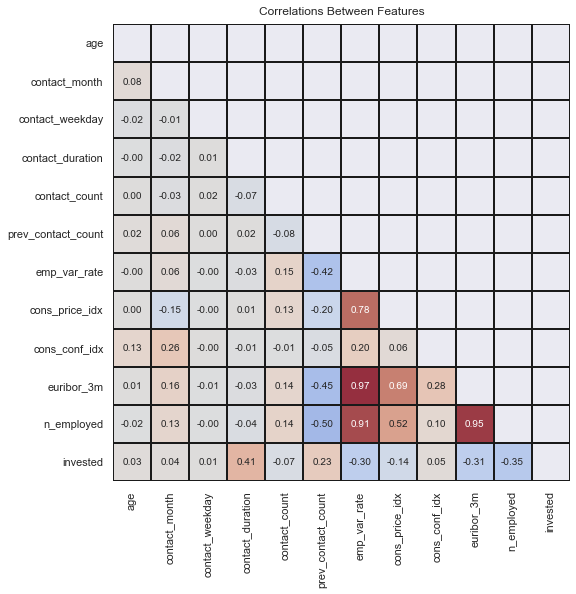

<IPython.core.display.Javascript object>

In [27]:
plotting.pair_corr_heatmap(data=df, scale=0.7)

Some of the economic context variables like 'euribor_3m', 'n_employed' and 'emp_var_rate' are highly correlated. 'recent_prev_contact' is highly correlated with 'prev_success', as is 'rev_contact' with 'prev_failure'.

<AxesSubplot:title={'center':'Correlation with Numeric Features'}, xlabel='Numeric Features', ylabel='Categorical Features'>

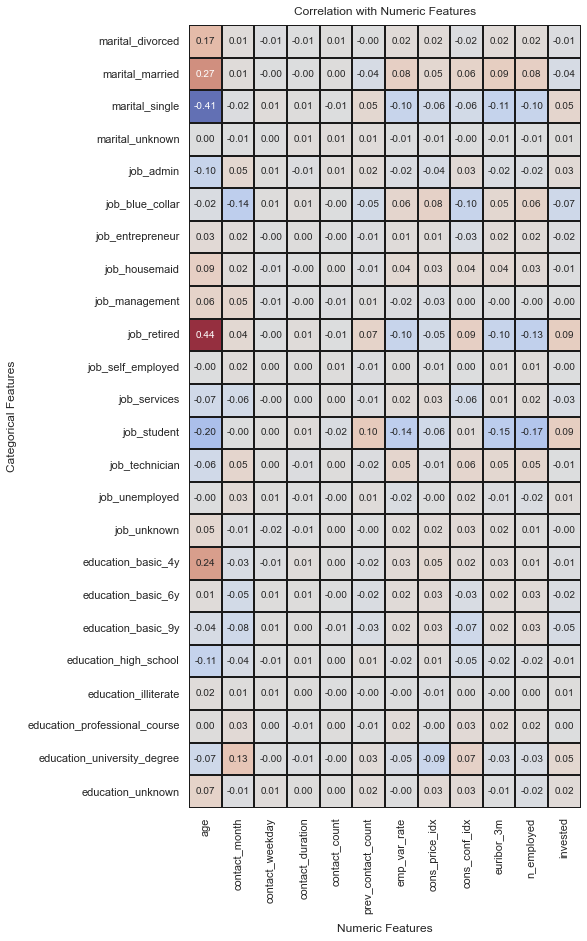

<IPython.core.display.Javascript object>

In [28]:
plotting.cat_corr_heatmap(
    data=df, categorical=["marital", "job", "education"], scale=0.6, fmt=".2f"
)

The jobs, education levels, and marital statuses seem more interestingly related to 'age' than anything else. There are some weaker relationships here as well.

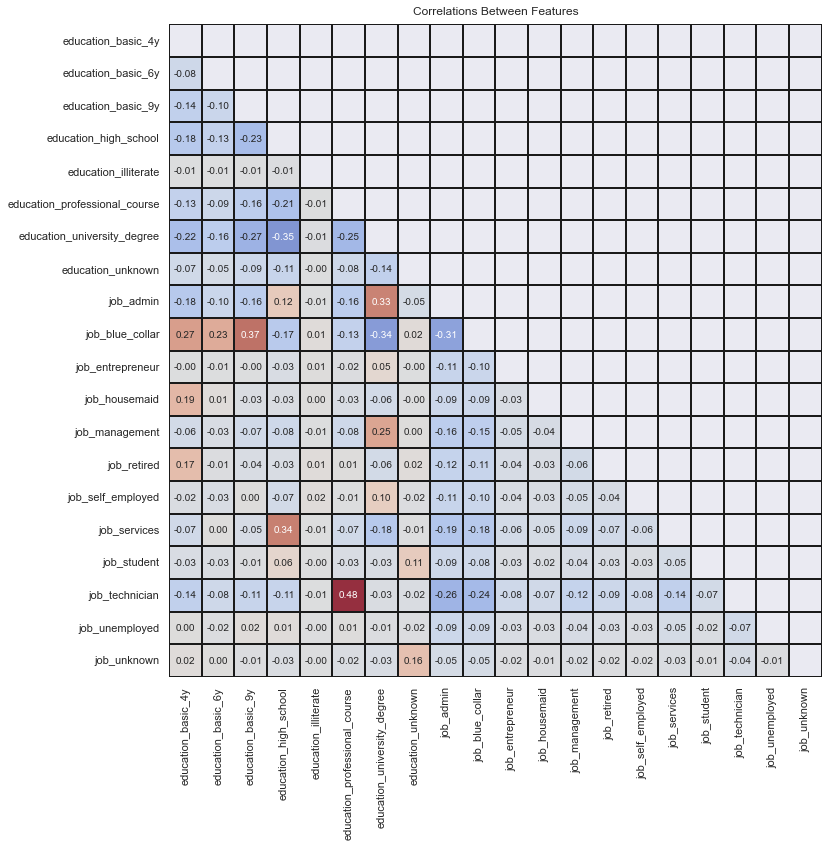

<IPython.core.display.Javascript object>

In [29]:
dummies = pd.get_dummies(df[["education", "job"]])
plotting.pair_corr_heatmap(data=dummies, scale=0.6, fmt=".2f")
del dummies

It's not surprising to find correlations between education types and jobs. The hottest correlation is between 'job_technician' and 'education_professional_course'. Similarly, 'job_services' is highly correlated with 'education_high_school'.

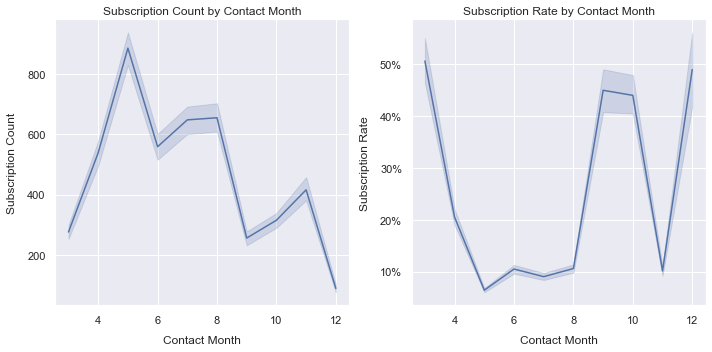

<IPython.core.display.Javascript object>

In [30]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
sns.lineplot(data=df, x="contact_month", y="invested", ax=ax1, estimator=np.sum)
sns.lineplot(data=df, x="contact_month", y="invested", ax=ax2)

ax1.set(
    ylabel="Subscription Count",
    xlabel="Contact Month",
    title="Subscription Count by Contact Month",
)

ax2.set(
    ylabel="Subscription Rate",
    xlabel="Contact Month",
    title="Subscription Rate by Contact Month",
)

percent_fmt = ticker.PercentFormatter(xmax=1)
ax2.yaxis.set_major_formatter(percent_fmt)
fig.tight_layout()

Interestingly, the subscription rate peaks in March, October, and September. The total subscriptions spike in May, and then have a roughly downward trend for the rest of the year.

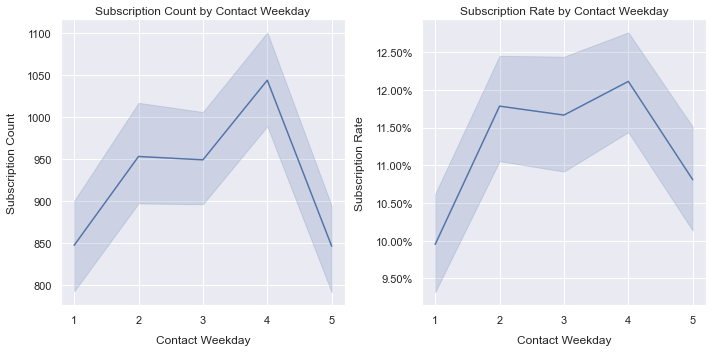

<IPython.core.display.Javascript object>

In [31]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
sns.lineplot(data=df, x="contact_weekday", y="invested", ax=ax1, estimator=np.sum)
sns.lineplot(data=df, x="contact_weekday", y="invested", ax=ax2)

ax1.set(
    ylabel="Subscription Count",
    xlabel="Contact Weekday",
    title="Subscription Count by Contact Weekday",
)

ax2.set(
    ylabel="Subscription Rate",
    xlabel="Contact Weekday",
    title="Subscription Rate by Contact Weekday",
)

percent_fmt = ticker.PercentFormatter(xmax=1)
ax2.yaxis.set_major_formatter(percent_fmt)
fig.tight_layout()

In [32]:
pd.get_dummies(df).groupby("contact_weekday").describe()

age                                                      \
                  count       mean        std   min   25%   50%   75%   max   
contact_weekday                                                               
1                8512.0  40.412359  10.267888  18.0  33.0  39.0  47.0  89.0   
2                8086.0  40.425798  10.595847  17.0  32.0  38.0  48.0  92.0   
3                8134.0  39.526801  10.453916  17.0  32.0  37.0  46.0  94.0   
4                8618.0  39.591437  10.389437  18.0  32.0  38.0  46.0  95.0   
5                7826.0  40.178508  10.366175  17.0  32.0  38.0  47.0  98.0   

                contact_month            ... prev_outcome_nonexistent       \
                        count      mean  ...                      75%  max   
contact_weekday                          ...                                 
1                      8512.0  6.518797  ...                      1.0  1.0   
2                      8086.0  6.684764  ...                      1.0  1.0   
3                      8134.0  6.694615  ...                      1.0  1.0   
4                      8618.0  6.672546  ...                      1.0  1.0   
5                      7826.0  6.463200  ...                      1.0  1.0   

                prev_outcome_success                                          \
                               count      mean       std  min  25%  50%  75%   
contact_weekday                                                                
1                             8512.0  0.032542  0.177446  0.0  0.0  0.0  0.0   
2                             8086.0  0.035988  0.186272  0.0  0.0  0.0  0.0   
3                             8134.0  0.033194  0.179154  0.0  0.0  0.0  0.0   
4                             8618.0  0.036435  0.187382  0.0  0.0  0.0  0.0   
5                             7826.0  0.028239  0.165666  0.0  0.0  0.0  0.0   

                      
                 max  
contact_weekday       
1                1.0  
2                1.0  
3                1.0  
4                1.0  
5                1.0  

[5 rows x 424 columns]

<IPython.core.display.Javascript object>

Evidently the beginning and end of the week are bad times for subscriptions, both by count and rate. Tuesday and Thursday are the best days, with the count peaking on Thursday. Still, all of this is quite noisy.

In [33]:
def sub_rate_bars(
    *, data, y, x="invested", title=None, title_pos=(0.6, 1.02), **kwargs
):
    """Draw mirror plot of subscription counts and subscription rates."""

    # Format strings for pretty titles
    x, y = utils.title(x), utils.title(y)
    data = utils.title_mode(data)

    # Plot mirror plot
    fig = plotting.mirror_plot(data=data, x=x, y=y, **kwargs)

    # Format tick labels
    ax2, ax1 = fig.get_axes()
    ax1.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0))
    ax2.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

    # Label axes
    ax1.set(xlabel="Subscription Rate", ylabel=None, title=f"Subscription Rate by {y}")
    ax2.set(
        xlabel="Number of Subscriptions",
        ylabel=y,
        title=f"Number of Subscriptions by {y}",
    )

    fig.tight_layout()

    if title is not None:
        fig.suptitle(title, x=title_pos[0], y=title_pos[1], fontsize=14)

    return fig

<IPython.core.display.Javascript object>

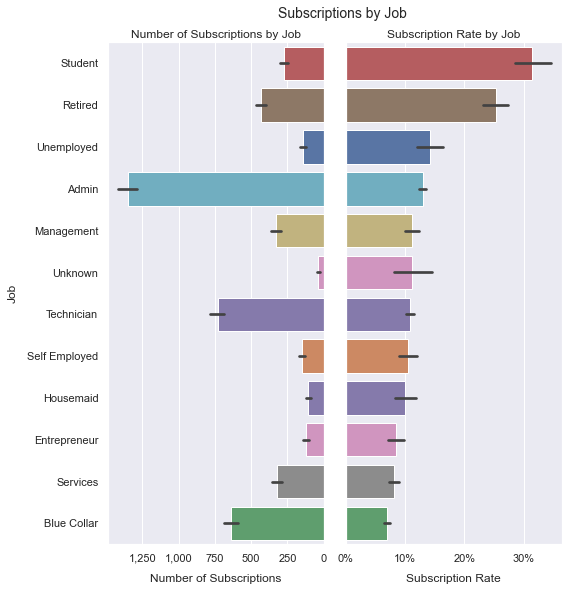

<IPython.core.display.Javascript object>

In [34]:
fig = sub_rate_bars(data=df, y="job", size=(4, 8), title="Subscriptions by Job")

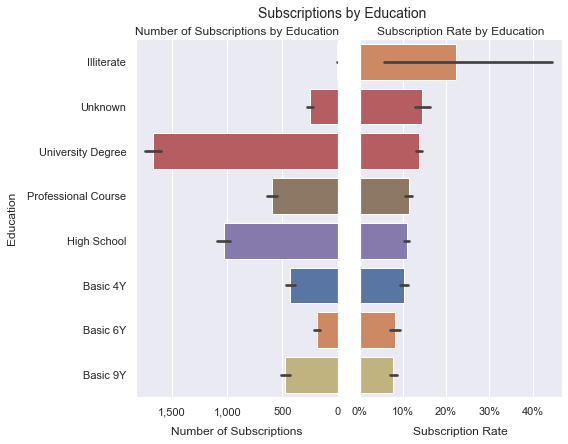

<IPython.core.display.Javascript object>

In [35]:
fig = sub_rate_bars(
    data=df,
    x="invested",
    y="education",
    title="Subscriptions by Education",
    size=(4, 6),
)

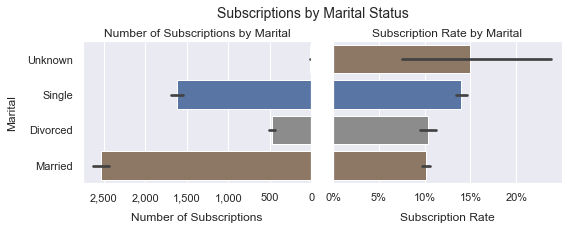

<IPython.core.display.Javascript object>

In [36]:
fig = sub_rate_bars(
    data=df,
    y="marital",
    title="Subscriptions by Marital Status",
    title_pos=(0.55, 1.05),
    size=(4, 3),
)

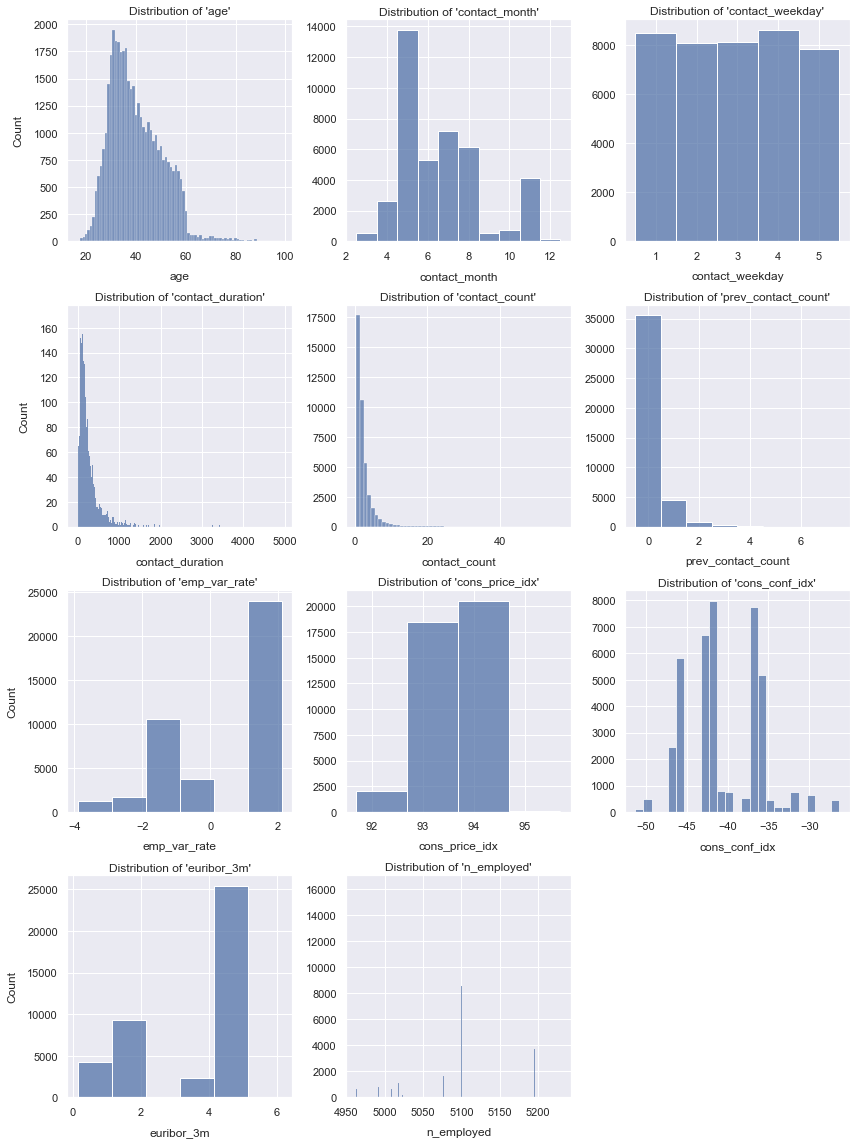

<IPython.core.display.Javascript object>

In [37]:
fig = plotting.multi_dist(data=df[utils.true_numeric_cols(df)], discrete=True, height=4)

# Modeling
## Modeling Imports

In [38]:
import joblib
from sklearn.base import clone
from sklearn.dummy import DummyClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import (
    LogisticRegression,
    LogisticRegressionCV,
    RidgeClassifier,
    SGDClassifier,
)
from sklearn.svm import SVC, LinearSVC
from sklearn.compose import (
    ColumnTransformer,
    make_column_transformer,
    make_column_selector,
)
from sklearn.metrics import (
    PrecisionRecallDisplay,
    ConfusionMatrixDisplay,
    RocCurveDisplay,
    classification_report,
)
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from imblearn.pipeline import Pipeline, make_pipeline
from imblearn.ensemble import (
    BalancedRandomForestClassifier,
    RUSBoostClassifier,
    EasyEnsembleClassifier,
)
from imblearn.over_sampling import SMOTE, SMOTENC, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB, ComplementNB, MultinomialNB
from sklearn.feature_selection import (
    SelectPercentile,
    SelectFromModel,
    VarianceThreshold,
    SelectKBest,
)
from sklearn.preprocessing import (
    StandardScaler,
    RobustScaler,
    PowerTransformer,
    QuantileTransformer,
    FunctionTransformer,
    OneHotEncoder,
    MaxAbsScaler,
    MinMaxScaler,
    PolynomialFeatures,
    SplineTransformer,
    KBinsDiscretizer,
)
import scipy as sp

<IPython.core.display.Javascript object>

My classes/modules:

In [39]:
from ndg_tools.sklearn import selection

<IPython.core.display.Javascript object>

## Train-Test Split
I begin my iterative modeling process by performing a train-test split.

I drop "contact_duration", because as noted in on the [UCI Repo](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing) for this dataset, it reduces the practical value of the model. This was the duration of the last call, after which the broker knew whether or not the customer invested. The duration of the final call wouldn't be known prior to the final call. Since this is not data that Banco de Portugal would have to plug into my predictive model, so there's no point in including it.

In [40]:
# drop NaNs and irrelevant columns
X = df.drop(columns=["invested", "contact_duration"])

# drop NaNs and slice target column
y = df["invested"].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((30882, 19), (10294, 19), (30882,), (10294,))

<IPython.core.display.Javascript object>

In [41]:
def classif_report(
    y_true,
    y_pred,
    *,
    labels=[0, 1],
    target_names=None,
    sample_weight=None,
    zero_division=0,
):
    """Returns a classification report as a DataFrame."""
    if target_names is not None:
        target_names = [x.lower() for x in target_names]
    report = classification_report(
        y_true,
        y_pred,
        labels=labels,
        target_names=target_names,
        sample_weight=sample_weight,
        output_dict=True,
        zero_division=zero_division,
    )
    return pd.DataFrame(report)

<IPython.core.display.Javascript object>

In [42]:
def diag_plots(
    name,
    y_true,
    y_pred,
    y_proba,
    compare_curves=None,
    display_labels=["No", "Yes"],
    palette="deep",
    desat=0.85,
    size=(12, 4),
):
    # Plot confusion matrix
    display_labels = [x.title() for x in display_labels]
    fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=size)
    cm = ConfusionMatrixDisplay.from_predictions(
        y_true,
        y_pred,
        normalize="true",
        display_labels=display_labels,
        cmap=plotting.get_desat_cmap("Blues", desat=desat),
        colorbar=False,
        ax=ax1,
    )
    ax1.grid(False)
    ax1.set(title=f"{name} Confusion Matrix")

    # Make color palette
    if compare_curves is None:
        colors = plotting.cat_palette(palette, keys=[name])
    else:
        model_names = list(set([x.estimator_name for x in compare_curves] + [name]))
        colors = plotting.cat_palette(palette, keys=model_names)

    prc = PrecisionRecallDisplay.from_predictions(
        y_true,
        y_proba,
        pos_label=1,
        name=name,
        ax=ax3,
        c=colors[name],
    )

    roc = RocCurveDisplay.from_predictions(
        y_true,
        y_proba,
        pos_label=1,
        name=name,
        ax=ax2,
        c=colors[name],
    )

    # Plot comparison curves
    if compare_curves is not None:
        compare_prc = [
            x for x in compare_curves if isinstance(x, PrecisionRecallDisplay)
        ]
        compare_roc = [x for x in compare_curves if isinstance(x, RocCurveDisplay)]
        for curve in compare_curves:
            if isinstance(curve, PrecisionRecallDisplay):
                curve.plot(ax3, c=colors[curve.estimator_name])
            elif isinstance(curve, RocCurveDisplay):
                curve.plot(ax2, c=colors[curve.estimator_name])
    ax3.set(xlabel="Recall", ylabel="Precision", title=f"{name} Precision-Recall Curve")
    ax2.set(
        xlabel="False Positive Rate",
        ylabel="True Positive Rate",
        title=f"{name} ROC Curve",
    )
    fig.tight_layout()
    return cm, prc, roc

<IPython.core.display.Javascript object>

In [43]:
def eval_model(
    estimator,
    name,
    X_test=X_test,
    y_test=y_test,
    display_labels=["No", "Yes"],
    highlight=("recall", "macro avg"),
    compare_curves=None,
    palette="deep",
    desat=0.85,
):
    # Make predictions
    y_true = y_test
    y_pred = estimator.predict(X_test)
    if hasattr(estimator, "predict_proba"):
        y_proba = estimator.predict_proba(X_test)[:, 1]
    elif hasattr(estimator, "decision_function"):
        y_proba = estimator.decision_function(X_test)
    else:
        y_proba = y_pred

    # Get classification report (table)
    rep = classif_report(y_true, y_pred, target_names=display_labels)
    cm, prc, roc = diag_plots(
        name,
        y_true,
        y_pred,
        y_proba,
        compare_curves=compare_curves,
        display_labels=display_labels,
        palette=palette,
        desat=desat,
    )

    # Display classification report, highlighting chosen metric
    display(
        rep.style.background_gradient(
            cmap=plotting.get_desat_cmap("coolwarm", desat=desat),
            subset=highlight,
            vmin=0.0,
            vmax=1.0,
        )
    )
    # Save the figure
    dst = f"images/{name.lower().replace(' ', '_')}_diagnostics.svg"
    fig.savefig(dst, bbox_inches="tight")
    return rep, cm, roc, prc

<IPython.core.display.Javascript object>

In [44]:
cat_sel = make_column_selector(dtype_include=["object", "string", "category"])

ct = ColumnTransformer(
    [("cat", OneHotEncoder(handle_unknown="ignore"), cat_sel)],
    remainder=StandardScaler(),
    verbose=True,
)
ct

ColumnTransformer(remainder=StandardScaler(),
                  transformers=[('cat', OneHotEncoder(handle_unknown='ignore'),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000002799B462370>)],
                  verbose=True)

<IPython.core.display.Javascript object>

In [45]:
pipe = Pipeline(
    [
        ("col", ct),
        ("cls", "passthrough"),
    ],
    verbose=True,
    memory="pipe_cache",
)
pipe

Pipeline(memory='pipe_cache',
         steps=[('col',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002799B462370>)],
                                   verbose=True)),
                ('cls', 'passthrough')],
         verbose=True)

<IPython.core.display.Javascript object>

In [46]:
X_train_matrix = pipe.fit_transform(X_train)
X_train_matrix

[ColumnTransformer] ........... (1 of 2) Processing cat, total=   0.1s
[ColumnTransformer] ..... (2 of 2) Processing remainder, total=   0.0s
[Pipeline] ............... (step 1 of 2) Processing col, total=   0.1s
[Pipeline] ............... (step 2 of 2) Processing cls, total=   0.0s


array([[ 0.        ,  0.        ,  0.        , ...,  0.94815064,
         0.77495884,  0.84724985],
       [ 0.        ,  0.        ,  0.        , ...,  2.30716619,
        -1.65947479, -2.0705376 ],
       [ 0.        ,  0.        ,  0.        , ..., -1.23058857,
        -1.36951028, -0.93999887],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.88343562,
         0.71500594,  0.33324266],
       [ 0.        ,  1.        ,  0.        , ...,  0.94815064,
         0.77611178,  0.84724985],
       [ 0.        ,  1.        ,  0.        , ..., -0.28143485,
         0.77668825,  0.84724985]])

<IPython.core.display.Javascript object>

In [47]:
X_train_matrix.shape

(30882, 52)

<IPython.core.display.Javascript object>

## Dummy Model

I create a dummy model which makes random predictions weighted by support. If the dummy model is good at all, it's due to pure luck.

In [48]:
pipe.set_params(cls=DummyClassifier(strategy="stratified"))

Pipeline(memory='pipe_cache',
         steps=[('col',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002799B482C40>)],
                                   verbose=True)),
                ('cls', DummyClassifier(strategy='stratified'))],
         verbose=True)

<IPython.core.display.Javascript object>

[ColumnTransformer] ........... (1 of 2) Processing cat, total=   0.1s
[ColumnTransformer] ..... (2 of 2) Processing remainder, total=   0.0s
[Pipeline] ............... (step 1 of 2) Processing col, total=   0.1s
[Pipeline] ............... (step 2 of 2) Processing cls, total=   0.0s


,no,yes,accuracy,macro avg,weighted avg
precision,0.887696,0.115681,0.800175,0.501689,0.800700
recall,0.887016,0.116379,0.800175,0.501697,0.800175
f1-score,0.887356,0.116029,0.800175,0.501692,0.800437
support,9134.000000,1160.000000,0.800175,10294.000000,10294.000000


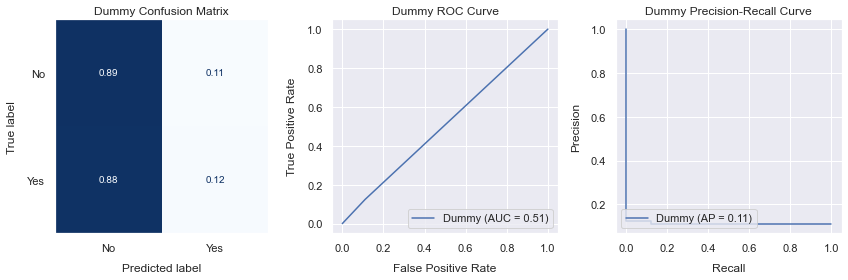

<IPython.core.display.Javascript object>

In [49]:
pipe.fit(X_train, y_train)
dummy_rep, dummy_cm, dummy_roc, dummy_prc = eval_model(pipe, "Dummy")

The confusion matrix indicates that the dummy gets ~90% of the true negatives and ~10% of the true positives, which is pretty bad.

The ROC curve is not even a curve, because if falls directly on the 1:1 line, with 0.5 AUC. The Precision-Recall Curve is a right angle. The macro average recall is ~0.5.

## Baseline Logistic Regression

In [50]:
pipe.set_params(cls=LogisticRegression(class_weight="balanced", solver="liblinear"))

Pipeline(memory='pipe_cache',
         steps=[('col',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002799B75EE50>)],
                                   verbose=True)),
                ('cls',
                 LogisticRegression(class_weight='balanced',
                                    solver='liblinear'))],
         verbose=True)

<IPython.core.display.Javascript object>

[Pipeline] ............... (step 2 of 2) Processing cls, total=   0.4s


,no,yes,accuracy,macro avg,weighted avg
precision,0.949346,0.298641,0.786575,0.623993,0.876020
recall,0.802277,0.662931,0.786575,0.732604,0.786575
f1-score,0.869637,0.411780,0.786575,0.640709,0.818043
support,9134.000000,1160.000000,0.786575,10294.000000,10294.000000


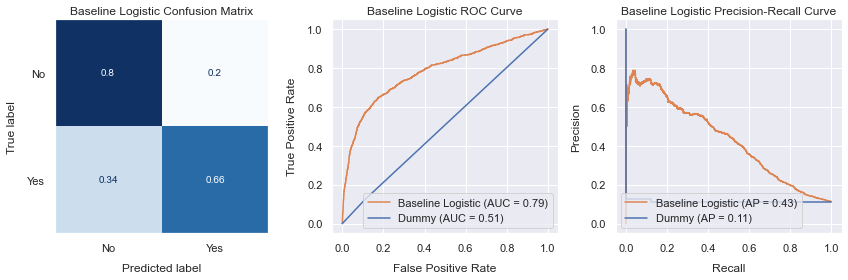

<IPython.core.display.Javascript object>

In [51]:
pipe.fit(X_train, y_train)
lr1_rep, lr1_cm, lr1_roc, lr1_prc = eval_model(
    pipe, "Baseline Logistic", compare_curves=[dummy_prc, dummy_roc]
)

It's better than the dummy, but not that much. The positive recall is terrible, and that will be an important thing to fix. I want to see a confusion matrix with a strong diagonal.

In [52]:
if "res" not in pipe.named_steps:
    pipe.steps.insert(-1, ("res", "passthrough"))
pipe

Pipeline(memory='pipe_cache',
         steps=[('col',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002799B75ECA0>)],
                                   verbose=True)),
                ('res', 'passthrough'),
                ('cls',
                 LogisticRegression(class_weight='balanced',
                                    solver='liblinear'))],
         verbose=True)

<IPython.core.display.Javascript object>

In [53]:
classif_grid = [
    {
        "cls": [BalancedRandomForestClassifier()],
        "cls__criterion": ["gini", "entropy"],
        "cls__max_depth": sp.stats.randint(10, 2000),
        "cls__min_samples_split": sp.stats.uniform(),
        "cls__min_samples_leaf": sp.stats.loguniform(1e-4, 0.25),
        "cls__replacement": [True, False],
        "cls__max_samples": sp.stats.uniform(0.25, 0.75),
        "res": ["passthrough"],
        "col__remainder": [MinMaxScaler(), StandardScaler(), RobustScaler()],
    },
    {
        "cls": [LogisticRegression(solver="liblinear")],
        "cls__C": sp.stats.loguniform(1e-4, 1e4),
        "cls__penalty": ["l1", "l2"],
        "cls__fit_intercept": [True, False],
        "cls__class_weight": ["balanced", None],
        "res": [RandomUnderSampler(), RandomOverSampler(), "passthrough"],
        "col__remainder": [MinMaxScaler(), StandardScaler(), RobustScaler()],
    },
    {
        "cls": [SGDClassifier()],
        "cls__penalty": ["l1", "l2", "elasticnet"],
        "cls__alpha": sp.stats.loguniform(1e-4, 1e4),
        "cls__l1_ratio": sp.stats.uniform(),
        "cls__loss": ["hinge", "squared_hinge"],
        "cls__fit_intercept": [True, False],
        "cls__class_weight": ["balanced", None],
        "cls__average": [True, False],
        "res": [RandomUnderSampler(), RandomOverSampler(), "passthrough"],
        "col__remainder": [MinMaxScaler(), StandardScaler(), RobustScaler()],
    },
]

classif_grid

[{'cls': [BalancedRandomForestClassifier()],
  'cls__criterion': ['gini', 'entropy'],
  'cls__max_depth': <scipy.stats._distn_infrastructure.rv_frozen at 0x2799bfb1e80>,
  'cls__min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen at 0x2799bf8afa0>,
  'cls__min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen at 0x2799bfb20d0>,
  'cls__replacement': [True, False],
  'cls__max_samples': <scipy.stats._distn_infrastructure.rv_frozen at 0x2799bf69340>,
  'res': ['passthrough'],
  'col__remainder': [MinMaxScaler(), StandardScaler(), RobustScaler()]},
 {'cls': [LogisticRegression(solver='liblinear')],
  'cls__C': <scipy.stats._distn_infrastructure.rv_frozen at 0x2799bfb2160>,
  'cls__penalty': ['l1', 'l2'],
  'cls__fit_intercept': [True, False],
  'cls__class_weight': ['balanced', None],
  'res': [RandomUnderSampler(), RandomOverSampler(), 'passthrough'],
  'col__remainder': [MinMaxScaler(), StandardScaler(), RobustScaler()]},
 {'cls': [SGDClassifier()],
  'cls__penalt

<IPython.core.display.Javascript object>

In [54]:
if RUN_SWEEPS:
    search = selection.sweep(
        pipe,
        classif_grid,
        X=X_train,
        y=y_train,
        n_jobs=-1,
        scoring="recall_macro",
        kind="rand",
        n_iter=1000,
        cv_dst="sweeps/classifier.joblib",
    )
    classif_results = search.cv_results_
else:
    classif_results = joblib.load("sweeps/classifier.joblib")

classif_results = selection.prune_cv(classif_results)
classif_results.head(10)

,param_cls,C,alpha,average,class_weight,criterion,fit_intercept,l1_ratio,loss,max_depth,...,min_samples_leaf,min_samples_split,penalty,replacement,remainder,param_res,params,mean_fit_time,mean_score,rank_score
0,BalancedRandomForestClassifier(),NaN,NaN,NaN,NaN,entropy,NaN,NaN,NaN,1687.0,...,0.000673,0.006712,NaN,True,MinMaxScaler(),passthrough,"{'cls': BalancedRandomForestClassifier(), 'cls...",4.652395,0.753722,1
1,BalancedRandomForestClassifier(),NaN,NaN,NaN,NaN,entropy,NaN,NaN,NaN,1903.0,...,0.001575,0.006487,NaN,False,StandardScaler(),passthrough,"{'cls': BalancedRandomForestClassifier(), 'cls...",3.967932,0.753117,2
2,BalancedRandomForestClassifier(),NaN,NaN,NaN,NaN,entropy,NaN,NaN,NaN,994.0,...,0.000166,0.006229,NaN,False,StandardScaler(),passthrough,"{'cls': BalancedRandomForestClassifier(), 'cls...",4.635400,0.753033,3
3,BalancedRandomForestClassifier(),NaN,NaN,NaN,NaN,gini,NaN,NaN,NaN,1036.0,...,0.001881,0.013024,NaN,False,RobustScaler(),passthrough,"{'cls': BalancedRandomForestClassifier(), 'cls...",3.802000,0.752049,4
4,BalancedRandomForestClassifier(),NaN,NaN,NaN,NaN,entropy,NaN,NaN,NaN,876.0,...,0.000340,0.015426,NaN,True,RobustScaler(),passthrough,"{'cls': BalancedRandomForestClassifier(), 'cls...",3.762799,0.751524,5
5,BalancedRandomForestClassifier(),NaN,NaN,NaN,NaN,entropy,NaN,NaN,NaN,1794.0,...,0.001249,0.024238,NaN,True,RobustScaler(),passthrough,"{'cls': BalancedRandomForestClassifier(), 'cls...",3.055200,0.749815,6
6,BalancedRandomForestClassifier(),NaN,NaN,NaN,NaN,gini,NaN,NaN,NaN,151.0,...,0.004398,0.003101,NaN,False,RobustScaler(),passthrough,"{'cls': BalancedRandomForestClassifier(), 'cls...",3.427600,0.747443,7
7,BalancedRandomForestClassifier(),NaN,NaN,NaN,NaN,gini,NaN,NaN,NaN,1170.0,...,0.000262,0.040490,NaN,True,RobustScaler(),passthrough,"{'cls': BalancedRandomForestClassifier(), 'cls...",2.911796,0.747145,8
8,BalancedRandomForestClassifier(),NaN,NaN,NaN,NaN,entropy,NaN,NaN,NaN,889.0,...,0.000291,0.056714,NaN,True,MinMaxScaler(),passthrough,"{'cls': BalancedRandomForestClassifier(), 'cls...",3.123795,0.746668,9
9,BalancedRandomForestClassifier(),NaN,NaN,NaN,NaN,entropy,NaN,NaN,NaN,699.0,...,0.001838,0.100373,NaN,False,StandardScaler(),passthrough,"{'cls': BalancedRandomForestClassifier(), 'cls...",3.546600,0.746249,10


<IPython.core.display.Javascript object>

In [55]:
pipe.set_params(
    cls__n_estimators=750,
    cls__n_jobs=-1,
    **classif_results.loc[0, "params"],
)

Pipeline(memory='pipe_cache',
         steps=[('col',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002799B75ECA0>)],
                                   verbose=True)),
                ('res', 'passthrough'),
                ('cls',
                 BalancedRandomForestClassifier(criterion='entropy',
                                                max_depth=1687,
                                                max_samples=0.9567946174013904,
                                                min_samples_leaf=0.0006725690033322993,
                                                min_samples_split=0.006711806997770076,
                                                n_estimators=750, n_jobs=-1,
                

<IPython.core.display.Javascript object>

[ColumnTransformer] ........... (1 of 2) Processing cat, total=   0.1s
[ColumnTransformer] ..... (2 of 2) Processing remainder, total=   0.0s
[Pipeline] ............... (step 1 of 3) Processing col, total=   0.1s
[Pipeline] ............... (step 2 of 3) Processing res, total=   0.0s
[Pipeline] ............... (step 3 of 3) Processing cls, total=   4.8s


,no,yes,accuracy,macro avg,weighted avg
precision,0.948727,0.360568,0.831941,0.654647,0.882449
recall,0.856908,0.635345,0.831941,0.746127,0.831941
f1-score,0.900483,0.460050,0.831941,0.680267,0.850852
support,9134.000000,1160.000000,0.831941,10294.000000,10294.000000


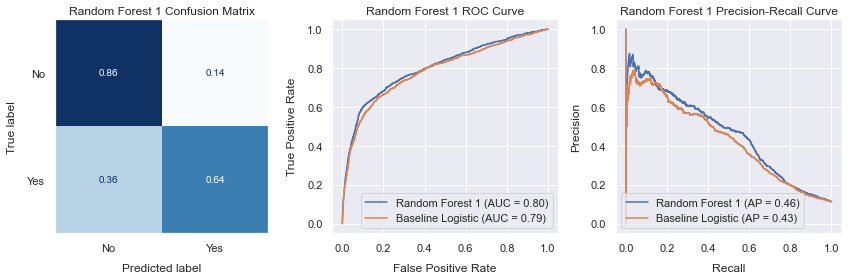

<IPython.core.display.Javascript object>

In [56]:
pipe.fit(X_train, y_train)
rf1_rep, rf1_cm, rf1_roc, rf1_prc = eval_model(
    pipe, "Random Forest 1", compare_curves=[lr1_prc, lr1_roc]
)

In [57]:
from sklearn.utils import compute_class_weight

class_weight = dict(
    zip([0, 1], compute_class_weight("balanced", classes=[0, 1], y=y) * 2)
)
class_weight

{0: 1.126967183950516, 1: 8.876050873032982}

<IPython.core.display.Javascript object>

In [58]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

<IPython.core.display.Javascript object>

In [311]:
hidden_units = np.linspace(500, 1, 3)[:-1].round(0)
hiddens = np.array(
    [
        (
            layers.Dense(units=x, activation="relu", activity_regularizer="l2"),
            layers.GaussianDropout(0.05),
        )
        for x in hidden_units
    ],
)

hiddens = hiddens.flatten().tolist()
display([x.units for x in hiddens if hasattr(x, "units")])
hiddens

[500, 250]

<IPython.core.display.Javascript object>

In [312]:
model = keras.Sequential(
    [layers.InputLayer(input_shape=52)]
    + hiddens
    + [layers.Dense(units=1, activation="sigmoid", activity_regularizer="l2")]
)

mets = [
    keras.metrics.TrueNegatives(name="tn"),
    keras.metrics.TruePositives(name="tp"),
    keras.metrics.Recall(name="rec"),
#     keras.metrics.BinaryAccuracy(name="acc"),
    keras.metrics.AUC(curve="PR", name="auc"),
]


<IPython.core.display.Javascript object>

In [328]:
from imblearn.ensemble import BalancedBaggingClassifier
from scikeras.wrappers import KerasClassifier

clf = KerasClassifier(
    model,
    optimizer=keras.optimizers.RMSprop(0.0001),
    loss="binary_crossentropy",
    metrics=mets,
    batch_size=3000,
    epochs=10,
    validation_split=0.0,
    validation_batch_size=1000,
    class_weight={0: 1, 1: 14},
    shuffle=True,
)

clf

KerasClassifier(
	model=<tensorflow.python.keras.engine.sequential.Sequential object at 0x0000027BAF21E430>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=<tensorflow.python.keras.optimizer_v2.rmsprop.RMSprop object at 0x0000027BB6F05610>
	loss=binary_crossentropy
	metrics=[<tensorflow.python.keras.metrics.TrueNegatives object at 0x0000027BAF0E5A00>, <tensorflow.python.keras.metrics.TruePositives object at 0x0000027BAF24C310>, <tensorflow.python.keras.metrics.Recall object at 0x0000027BAD447160>, <tensorflow.python.keras.metrics.AUC object at 0x0000027BAD4475E0>]
	batch_size=3000
	validation_batch_size=1000
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=10
	class_weight={0: 1, 1: 14}
)

<IPython.core.display.Javascript object>

In [329]:
pipe.set_params(cls=clf, res="passthrough")

pipe.fit(X_train, y_train)

[Pipeline] ............... (step 2 of 3) Processing res, total=   0.0s
Epoch 1/10
11/11 [==============================] - 0s 11ms/step - loss: 1.2500 - tn: 20371.0000 - tp: 2559.0000 - rec: 0.7356 - auc: 0.4740
Epoch 2/10
11/11 [==============================] - 0s 11ms/step - loss: 1.2468 - tn: 19793.0000 - tp: 2623.0000 - rec: 0.7540 - auc: 0.4770
Epoch 3/10
11/11 [==============================] - 0s 11ms/step - loss: 1.2463 - tn: 19857.0000 - tp: 2603.0000 - rec: 0.7482 - auc: 0.4768
Epoch 4/10
11/11 [==============================] - 0s 11ms/step - loss: 1.2450 - tn: 19724.0000 - tp: 2643.0000 - rec: 0.7597 - auc: 0.4770
Epoch 5/10
11/11 [==============================] - 0s 11ms/step - loss: 1.2447 - tn: 19681.0000 - tp: 2633.0000 - rec: 0.7568 - auc: 0.4763
Epoch 6/10
11/11 [==============================] - 0s 11ms/step - loss: 1.2422 - tn: 19523.0000 - tp: 2653.0000 - rec: 0.7626 - auc: 0.4790
Epoch 7/10
11/11 [==============================] - 0s 11ms/step - loss: 1.2424 - t

Pipeline(memory='pipe_cache',
         steps=[('col',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000027BB6F90280>)],
                                   verbose=True)),
                ('res', 'passthrough'),
                ('cls',
                 KerasClassifier(batch_size=3000, class_weight={0: 1, 1: 14}, epochs=10, loss='b...nsorflow.python.keras.metrics.Recall object at 0x0000027BAD447160>, <tensorflow.python.keras.metrics.AUC object at 0x0000027BAD4475E0>], model=<tensorflow.python.keras.engine.sequential.Sequential object at 0x0000027BAF21E430>, optimizer=<tensorflow.python.keras.optimizer_v2.rmsprop.RMSprop object at 0x0000027BB6F05610>, validation_batch_size=1000))],
         verbose=True)

<IPython.core.display.Javascript object>

4/4 [==============================] - 0s 2ms/step


,no,yes,accuracy,macro avg,weighted avg
precision,0.952641,0.248282,0.723625,0.600462,0.873269
recall,0.724546,0.716379,0.723625,0.720462,0.723625
f1-score,0.823083,0.368760,0.723625,0.595921,0.771887
support,9134.000000,1160.000000,0.723625,10294.000000,10294.000000


(                    no          yes  accuracy     macro avg  weighted avg
 precision     0.952641     0.248282  0.723625      0.600462      0.873269
 recall        0.724546     0.716379  0.723625      0.720462      0.723625
 f1-score      0.823083     0.368760  0.723625      0.595921      0.771887
 support    9134.000000  1160.000000  0.723625  10294.000000  10294.000000,
 <sklearn.metrics._plot.precision_recall_curve.PrecisionRecallDisplay at 0x27bb70bedc0>)

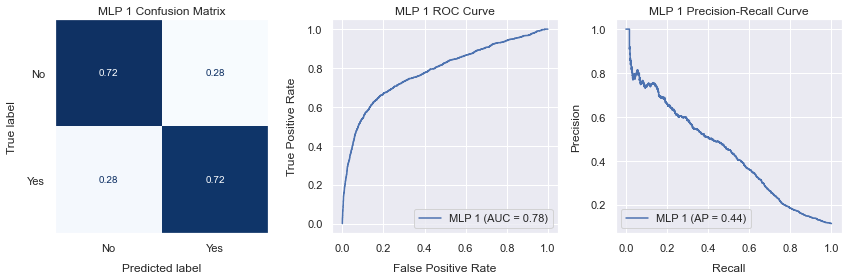

<IPython.core.display.Javascript object>

In [330]:
eval_model(pipe, "MLP 1")

In [333]:
clf.model.save("models/mlp")

INFO:tensorflow:Assets written to: models/mlp\assets


INFO:tensorflow:Assets written to: models/mlp\assets


<IPython.core.display.Javascript object>

# Interpretation
Now to see which features are most important for prediction. These features and the strengths of their relationships with the target variable will be crucial information for marketing managers at Banco de Portugal.

First I gather the feature names from my `FloatArrayForcer`.

In [135]:
feat_names = classifier_pipe["float_forcer"].feature_names_
feat_names

NameError: name 'classifier_pipe' is not defined

<IPython.core.display.Javascript object>

Then I grab the coefficients and put them alongside their names.

In [ ]:
coef = pd.DataFrame(logit.coef_.T, columns=["coef"], index=feat_names).squeeze().copy()
print(f"size: {coef.size}")
coef.sort_values().head()

#### All Coefficients

In [ ]:
ax = plotting.heated_barplot(data=coef, figsize=(8, 15))
plotting.annot_bars(ax, dist=0.15)
ax.set(xlabel="Coefficient", title="Final Model: All Coefficients")

There are too many low coefficients for an easily readable graph, so I slice out the larger ones and plot them.

In [ ]:
# Slice out only the large coefficients;
major_coef = coef.loc[coef.abs() >= 0.1].copy()

# Plot heated bars
ax = plotting.heated_barplot(data=major_coef, figsize=(5, 5))

# Add annotations
plotting.annot_bars(ax, dist=0.25)
ax.set_xlim(-1.1, 0.6)

ax.set(
    title="Final Model Coefficients",
    xlabel="Coefficient",
)

## Positive Coefficients
The largest positive coefficient is 'prev_success', which is hardly surprising. Clients who previously invested in accounts because of the bank's marketing campaigns are likely to invest again. This is common sense, but it's good to see that the model aligns with common sense.

The second largest positive coefficient is 'contact_cellular', meaning that calling the client on a cell phone increases the probability of investment. Why? I don't know. Maybe people are more likely to take these calls on their cell phones than when they're at home with their families. Or perhaps it has to do with what kind of people used cell phones rather than landlines in 2008-2010. It's about half the magnitude of 'prev_success', indicating that it has a weaker relationship. That also comports with common sense.

In [ ]:
# Create special title-formatted DataFrame
title_df = utils.title_mode(df)
title_df["Phone"] = title_df["Contact Cellular"].map(
    lambda x: "Cellular" if x else "Landline"
)

# Make the graph
fig, ax = plt.subplots(figsize=(6, 8))
sns.countplot(data=title_df, y="Job", hue="Phone", ax=ax)
ax.set(ylabel=None, xlabel="Count", title="Phone Type by Job")

In [ ]:
# Plot subscription rates for positive coeff features
fig = plotting.multi_rel(
    data=title_df, x=["Prev Success", "Phone"], y="Invested", kind="bar", size=(4, 4)
)

# Format mean as percent
axs = fig.get_axes()
axs[0].yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))
axs[0].set(
    ylabel="Subscription Rate",
    title="Subscription Rate by Previous Result",
    xlabel="Previous Success",
)
axs[1].set(title="Subscription Rate by Phone Type", xlabel="Phone Type")

Well, even retirees were using cell phones apparently. I don't know why it's related to investing. Perhaps just because it's more popular?

>It is certainly more popular.

In [ ]:
fig = plotting.multi_countplot(
    data=title_df[["Prev Success", "Phone"]], orient="v", annot=False
)
axs = fig.get_axes()
axs[0].set(xlabel="Previous Success", title="Overall Representation: Previous Success")
axs[1].set(xlabel="Phone Type", title="Overall Representation: Phone Type")
del title_df

## Negative Coefficients
The largest negative coefficient (in magnitude)&mdash;and the largest coefficient of all by far&mdash;is 'n_employed'. This is a quarterly measure of how many people are employed in Portugal, in thousands. Its magnitude of 0.62 is more than twice that of 'prev_success' at 0.3. It's also over twice as important as 'contact_month_may', which is 0.29. Apparently May is just a terrible month for getting people to invest in term deposits. Or at least it was in 2008, 2009, and 2010.

As you can see from the graph below, the employment count has a clear negative relationship with the bank's subscription rate. What's unclear to me is why. Does employment decrease because of increased investment? That doesn't seem plausible, although I'm no economist. Do people invest while unemployed, or when the economy is slow? That doesn't seem plausible either.

In [ ]:
# Create special plotting DataFrame
neg_df = utils.title_mode(df)
neg_df["N Employed"] *= 1000

# Create Axes
fig, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(data=neg_df, x="N Employed", y="Invested", ax=ax)

# Format and label
ax.xaxis.set_major_formatter(plotting.big_number_formatter(2))
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))
ax.set(
    ylabel="Subscription Rate",
    xlabel="Employment Count",
    title="Subscription Rate by Portuguese Employment Count",
)

No, unemployed people don't invest a lot. And that makes sense, seeing as they probably don't have a lot of extra money laying around. It's surprising that they invest at all, actually. 14% conversion is not bad for people who don't have disposable income. Maybe these are more like Paris Hilton types.

Anyway, regardless of *why* employment is inversely related to investment conversions, we can be certain that it is related in this way. The bank should invest more in marketing when employment is low.

In [ ]:
df.query("job == 'unemployed'")["invested"].value_counts(1)

The poor conversion for the month of May is similarly mysterious. Recall the figure below, reproduced from the exploration setting. Interestingly, May has the most total sales despite having the lowest subscription rate.

In [ ]:
sub_rate_bars(data=df, y="contact_month", size=(4, 6))

For whatever reason, May has nearly $14,000$ observations while the top $3$ subscription rate months have observation counts in the hundreds.

Why are these categories so uneven, I wonder? Perhaps it has something to do with the fact that the top $4$ highest observation count months are in the summer. Does the bank just spend more on marketing in the summer? Or is this just a very uneven sample of a larger dataset held by the bank? I don't know.

Anyway, the data clearly indicates that May is a very bad month for conversion efficiency.

In [ ]:
fig = plotting.multi_countplot(data=df[["contact_month"]])
axs = fig.get_axes()
axs[0].set(title="Overall Representation: Contact Month")
plotting.map_ticklabels(axs[0], utils.to_title, axis="y")

# Recommendations

#### When employment is low, spend more resources on marketing the investment product.
There is a very strong relationship between low employment and investment, although the true nature of the relationship remains a mystery.
#### Relax more than you're used to in summer months.
May is a strikingly bad month for conversion efficiency. Evidently much effort is expended in the summer, but it's not very efficient.
#### Prioritize clients who have previously invested as a result of marketing efforts.
This is probably already something you're doing, but rest assured that it works.
#### Prioritize cellular clients.
Clients who use a cell phone are more likely to invest than those who use a landline.

# Future Work
The most important future work would be to build different types of models and compare them to my final `LogisticRegression`. `RandomForestClassifier`, `LinearSVC`, and `KNeighborsClassifier` are three obvious choices. Unlike most support vector machines, the `LinearSVC` is able to handle datasets with large numbers of observations. But as it is a linear model, I still have to worry about multicollinearity.

Multicollinearity is not a concern, however, with the `RandomForestClassifier` or the `KNeighborsClassifier`. That means no features have to be dropped on that account. This alone is reason to think one of these models could perform better than my regression.  Of all of these, I see the most potential in the `RandomForestClassifier`, in part because it has so many hyperparameters to tune.

Another unrelated idea is to try testing the models using a temporal train-test split rather than a random split. For example, the earliest $75\%$ of observations could serve as the training set and the latest $25\%$ could serve as the test set. This would be an even more realistic way to test a model's predictive capabilities. While I do not have access to the date of each observation, I do know that they are ordered by date. Since I do have access to the month of each observation, I could also potentially infer the dates.

I would also like to try using sophisticated imputation techniques to fill some of the large missing value gaps in the dataset. I would like to experiment with Scikit-Learn's `IterativeImputer` and `KNNImputer` to see if advanced imputation leads to better predictions than simply filling nulls with $0$. Since there are enormous gaps for features like 'prev_outcome' (i.e. the vast majority are missing), I'm curious whether advanced imputation techniques would make things better or worse.

- 